# 1 - Wine Database
## 1) Création du dataframe et importation des librairies

In [1]:
from pandas import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('wine.data')

## 2) Familiarisation avec la base de données

In [2]:
#add column name for each column of df dataframe
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

#show the first element of the dataframe
print("\n\n\n------ head of the dataframe:")
print(df.head())

#show the number of rows and columns in the dataframe
print("\n\n\n------ shape of the dataframe:")
print(df.shape)


#show missing values in the dataframe
print("\n\n\n------ missing values in the dataframe:")
print(df.isnull().sum())

#show statistics of the dataframe
print("\n\n\n------ statistics of the dataframe:")
print(df.describe())

#print number of elements in each class
print("\n\n\n------ Number of elements in each class:")
print(df['Class'].value_counts())





------ head of the dataframe:
   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    13.20        1.78  2.14               11.2        100   
1      1    13.16        2.36  2.67               18.6        101   
2      1    14.37        1.95  2.50               16.8        113   
3      1    13.24        2.59  2.87               21.0        118   
4      1    14.20        1.76  2.45               15.2        112   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             4.38  1.05                          3.40     

## 3) Analyse exploratoire des données




------ Boxplot of each categorie for each class:


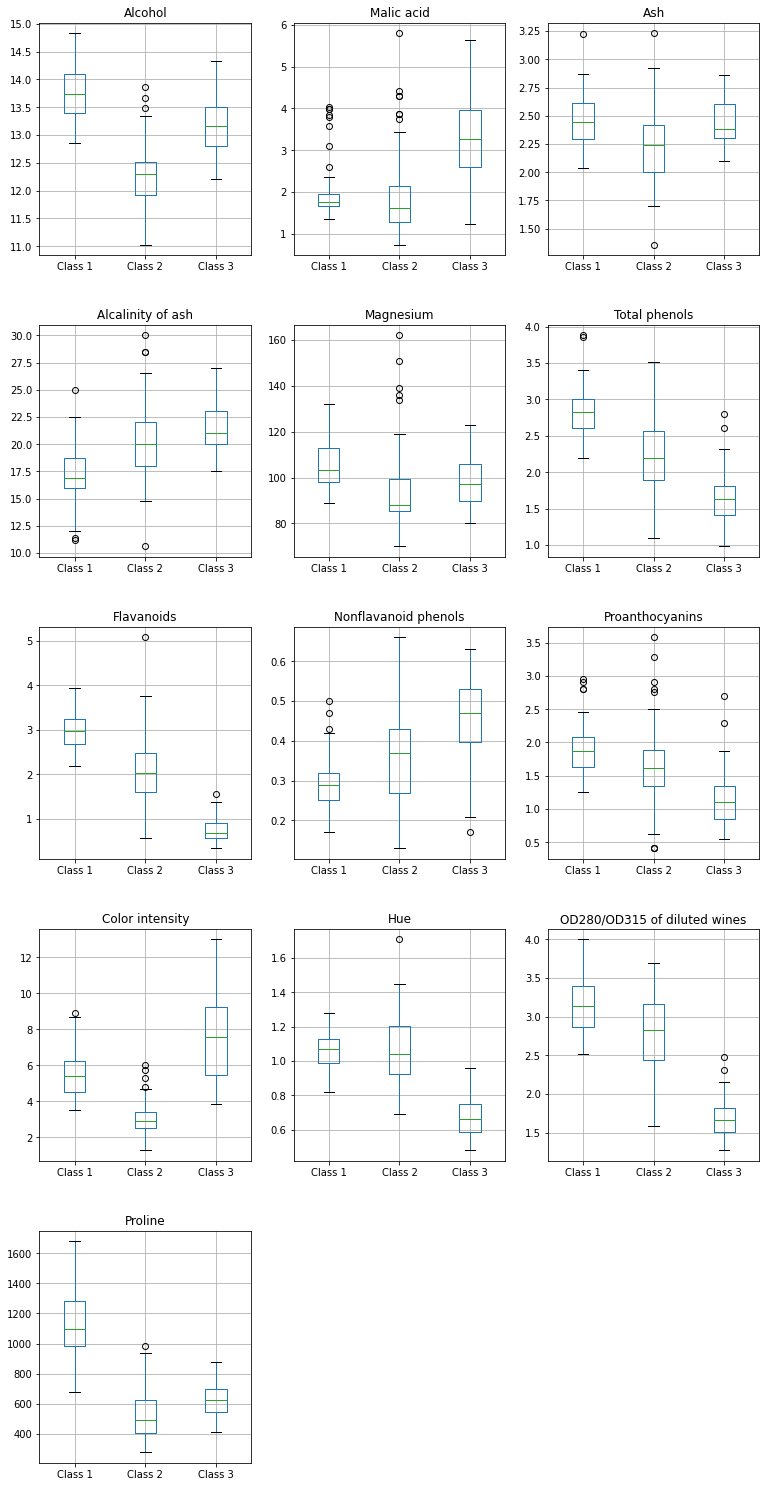

In [3]:

def Boxplot(df,columns,nbRow,nbCol):
    fig, axes = plt.subplots(nrows=nbRow, ncols=nbCol, figsize=(20, 20))
    axes=axes.flatten()

    for i, column in enumerate(columns):
        df.boxplot(column=column, by="Class", ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
        axes[i].set_title(column)
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')

    for i in range(nbRow*nbCol):
        if i >= len(columns):
            axes[i].set_visible(False)
        
    plt.title('')
    plt.suptitle('')
    plt.subplots_adjust(left=.5, bottom=.5, right=1.0, top=1.5, wspace=.2,hspace=.3)
    plt.show()

print("\n\n\n------ Boxplot of each categorie for each class:")
Boxplot(df, df.columns[1:],5,3)

Après examination, nous allons relever les colonnes dans le tableau INTRESTING_VAL ci-dessous comme ayant le plus d'intérêt pour determiner une classe de vin depuis ses données




------ Scatterplot of each intresting category:
Class 1 = Rouge / Class 2 = Vert / Class 3 = Bleu


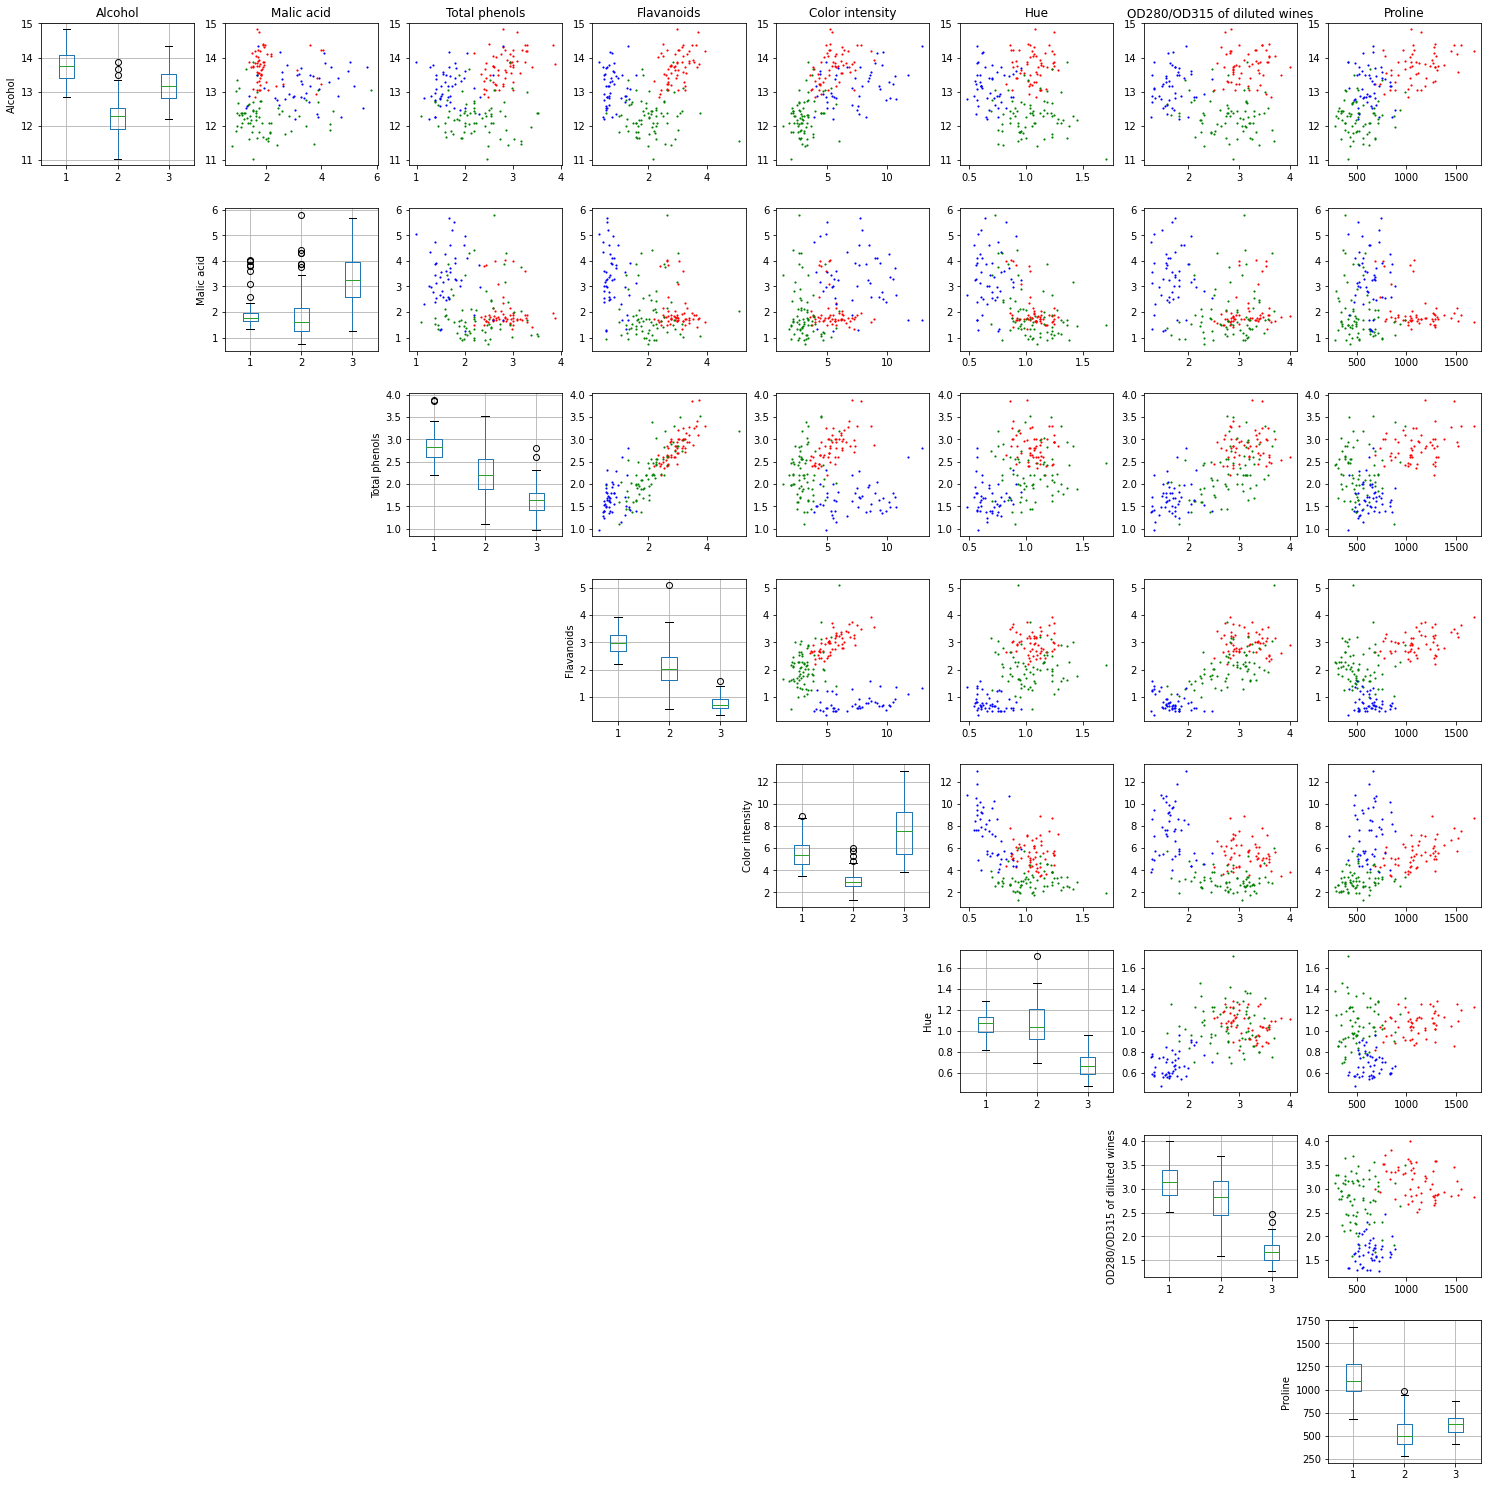

In [4]:
INTRESTING_VAL = ["Alcohol","Malic acid","Total phenols","Flavanoids",
"Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
#Boxplot(df,INTRESTING_VAL,5,3)

dfC1 = df[df['Class'] == 1]
dfC2 = df[df['Class'] == 2]
dfC3 = df[df['Class'] == 3]

def ScatterPlot(df,columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(20, 20))
    axes=axes.flatten()

    index = 0
    for i, column1 in enumerate(columns):
        for j, column2 in enumerate(columns):
            if i == j:
                df.boxplot(column=column1, by="Class", ax=axes[index])
                axes[index].set_xlabel('')
            else:
                if j < i:
                    axes[index].set_visible(False)
                else:
                    axes[index].set_visible(True)
                dfC1.plot.scatter(y=column1, x=column2, ax=axes[index], s=1.3, color='red')
                dfC2.plot.scatter(y=column1, x=column2, ax=axes[index], s=1.3, color='green')
                dfC3.plot.scatter(y=column1, x=column2, ax=axes[index], s=1.3, color='blue')
            
            if j == i:
                axes[index].set_ylabel(column1)
                axes[index].set_title('')
            else:
                axes[index].set_ylabel('')
                axes[index].set_title('')
            if i == 0:
                axes[index].set_xlabel('')
                axes[index].set_title(column2)
            else:
                axes[index].set_xlabel('')
                axes[index].set_title('')
            index = index + 1
        
    plt.title('')
    plt.suptitle('')
    plt.subplots_adjust(left=.0, bottom=.5, right=1.0, top=1.5, wspace=.2,hspace=.3)
    plt.show()

print("\n\n\n------ Scatterplot of each intresting category:")
print("Class 1 = Rouge / Class 2 = Vert / Class 3 = Bleu")
ScatterPlot(df,INTRESTING_VAL)


On peut identifier les differentes classes de vin selon les caractéristiques suivantes:<br>
*le nombres specifie la classe qui peut être identifiée grâce à la categorie spécifiée*<br>
*Si il y a 1-2-3, alors le parametre permet de differencier les 3 classes*<br>
<br>
2     Alcohol<br>
3     Malic acid<br>
1-2-3 Total Phenols<br>
1-2-3 Flavanoids<br>
2     Color Intensity<br>
3     Hue<br>
3     OD280/OD315 of diluted wine<br>
1     Proline<br>

## 2 - Modèle à base de règles

## a-b) If-then-else - Variable Individuelle et Variable multiple

predInd sont des fonctions utilisant des variables individuelles <br>
predMult sont des fonctions utilisant des variables multiples <br>
_n_m a la suite de la fonction signifie que la var n et m sont utilisées <br>

In [5]:
def predInd_Fl(row):
    if row['Flavanoids'] < 1.1:
        return 3
    elif row['Flavanoids'] > 2.5:
        return 1
    else:    
        return 2

def predInd_CI(row):
    if row['Color intensity'] < 4:
        return 2
    elif row['Color intensity'] < 6:
        return 1
    else:    
        return 3

def predInd_TP(row):
    if row['Total phenols'] < 1.75:
        return 3
    elif row['Total phenols'] < 2.6:
        return 2
    else:    
        return 1

def predMult_F_A(row):
    if row['Flavanoids'] < 1.75 and row['Alcohol'] > 12:
        return 3
    elif row['Alcohol'] > 12.75:
        return 1
    else:    
        return 2

def predMult_H_CI(row):
    if row['Hue'] < 0.8 and row['Color intensity'] > 3.8:
        return 3
    elif row['Color intensity'] > 3.75:
        return 1
    else:    
        return 2

def predMult_F_P_MA(row):
    if row['Flavanoids'] < 1.25:
        return 3
    elif row['Proline'] < 750 and row['Malic acid'] < 3.5:
        return 2
    else:    
        return 1

def confusionMatrix(df,predfct):
    cm = np.zeros((3,3))
    for i in range(len(df)):
        pred = (int)(predfct(df.iloc[i]) - 1)
        true = (int)(df.iloc[i]['Class'] - 1)
        cm[pred][true] += 1
    return cm        

def accuracy(cm,c):
    cp0 = c-1
    cp1 = (cp0+1)%3
    cp2 = (cp0+2)%3
    return (cm[cp0,cp0] + cm[cp1,cp1] + cm[cp1,cp2] + cm[cp2,cp2] + cm[cp2,cp1])/cm.sum()
def precision(cm,c):
    cp0 = c-1
    cp1 = (cp0+1)%3
    cp2 = (cp0+2)%3
    return (cm[cp0,cp0]/(cm[cp0,cp0]+cm[cp0,cp1]+cm[cp0,cp2]))
def recall(cm,c):
    cp0 = c-1
    cp1 = (cp0+1)%3
    cp2 = (cp0+2)%3
    return (cm[cp0,cp0]/(cm[cp0,cp0]+cm[cp1,cp0]+cm[cp2,cp0]))
def fScore(cm,c):
    return (2*precision(cm,c)*recall(cm,c))/(precision(cm,c)+recall(cm,c))

def displayTable(cm):
    table = [["class","accuracy","precision","recall","f-score"],
             ["1",round(accuracy(cm,1),3),round(precision(cm,1),3),round(recall(cm,1),3),round(fScore(cm,1),3)],
             ["2",round(accuracy(cm,2),3),round(precision(cm,2),3),round(recall(cm,2),3),round(fScore(cm,2),3)],
             ["3",round(accuracy(cm,3),3),round(precision(cm,3),3),round(recall(cm,3),3),round(fScore(cm,3),3)]]
    return table

def displayModelResult(df,predfct):
    print("")
    print("Test du modele : "+str(predfct.__name__))
    print("Confusion Matrix :")
    print(confusionMatrix(df,predfct))
    table = displayTable(confusionMatrix(df,predfct))
    for line in table:
        for column in line:
            print('{:10s} '.format(str(column)),end='')
        print("")

print("------ If-then-else Model results:")
print("Fl = Flatanoids / CI = Color intensity / TP = Total phenols / F_A = Flavanoids-Alcohol / H_CI = Hue-Color intensity / F_P_MA = Flavanoids-Proline-Malic acid")
print("Confusion Matrix axes: \n    vertical = pred [c1, c2, c3],\n    horizontal = true [c1, c2, c3]")

displayModelResult(df,predInd_Fl)
displayModelResult(df,predInd_CI)
displayModelResult(df,predInd_TP)
displayModelResult(df,predMult_F_A)
displayModelResult(df,predMult_H_CI)
displayModelResult(df,predMult_F_P_MA)



------ If-then-else Model results:
Fl = Flatanoids / CI = Color intensity / TP = Total phenols / F_A = Flavanoids-Alcohol / H_CI = Hue-Color intensity / F_P_MA = Flavanoids-Proline-Malic acid
Confusion Matrix axes: 
    vertical = pred [c1, c2, c3],
    horizontal = true [c1, c2, c3]

Test du modele : predInd_Fl
Confusion Matrix :
[[52. 17.  0.]
 [ 6. 50.  9.]
 [ 0.  4. 39.]]
class      accuracy   precision  recall     f-score    
1          0.87       0.754      0.897      0.819      
2          0.797      0.769      0.704      0.735      
3          0.927      0.907      0.812      0.857      

Test du modele : predInd_CI
Confusion Matrix :
[[31.  8. 18.]
 [ 7. 62.  1.]
 [20.  1. 29.]]
class      accuracy   precision  recall     f-score    
1          0.701      0.544      0.534      0.539      
2          0.904      0.886      0.873      0.879      
3          0.774      0.58       0.604      0.592      

Test du modele : predInd_TP
Confusion Matrix :
[[46. 17.  2.]
 [12. 41. 14.]
 

Nous pouvons remarquer les fonctions qui utilise des variables multiples ont des scores plus élevés que les fonctions qui utilise des variables individuelles

## 3. L’algorithme des k plus proches voisins (k-NN)


In [6]:
#normaliuation of the data
dfNorm = (df-df.min())/(df.max()-df.min())
dfNorm['Class'] = df['Class']

dfNorm.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,0.516756,0.316183,0.538053,0.459637,0.321604,0.452503,0.355157,0.438333,0.371277,0.322082,0.387791,0.488752,0.333164
std,0.773991,0.212844,0.221208,0.147102,0.171962,0.154065,0.216022,0.210687,0.235194,0.180298,0.198332,0.186289,0.258279,0.224596
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.350000,0.169960,0.454545,0.340206,0.195652,0.262069,0.181435,0.264151,0.264984,0.164676,0.243902,0.241758,0.158345
50%,2.000000,0.531579,0.223320,0.534759,0.458763,0.304348,0.472414,0.377637,0.396226,0.359621,0.290102,0.390244,0.553114,0.281027
75%,3.000000,0.694737,0.466403,0.641711,0.561856,0.402174,0.627586,0.531646,0.584906,0.485804,0.419795,0.520325,0.695971,0.504280
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nous voyons ci-dessus que le dataframe est bien normalisé, on peut donc utiliser l’algorithme des k plus proches voisins (k-NN)

KNN using hold-out validation,  10 splits
k =  1 | Accuracy : 0.967196 | Precision : 0.950227 | Recall : 0.959387 | F-Score : 0.951437
k =  2 | Accuracy : 0.962963 | Precision : 0.946504 | Recall : 0.947476 | F-Score : 0.944790
k =  3 | Accuracy : 0.964021 | Precision : 0.942838 | Recall : 0.955286 | F-Score : 0.945603
k =  5 | Accuracy : 0.969312 | Precision : 0.952736 | Recall : 0.961627 | F-Score : 0.955074
k =  7 | Accuracy : 0.976720 | Precision : 0.964112 | Recall : 0.970817 | F-Score : 0.965997
k = 10 | Accuracy : 0.971429 | Precision : 0.957919 | Recall : 0.961284 | F-Score : 0.957674

KNN using cross validation,  5 folds
k =  1 | Accuracy : 0.954286 | Precision : 0.931965 | Recall : 0.939961 | F-Score : 0.932430
k =  2 | Accuracy : 0.943810 | Precision : 0.921411 | Recall : 0.923426 | F-Score : 0.917986
k =  3 | Accuracy : 0.973333 | Precision : 0.958179 | Recall : 0.966141 | F-Score : 0.960635
k =  5 | Accuracy : 0.957143 | Precision : 0.938726 | Recall : 0.946292 | F-Score :

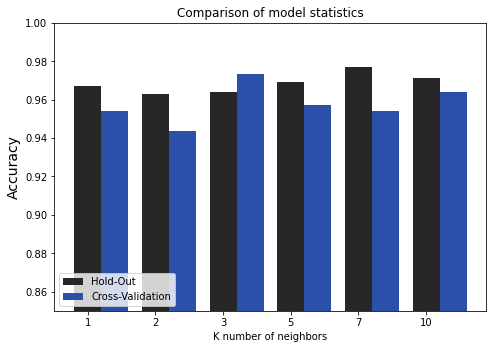

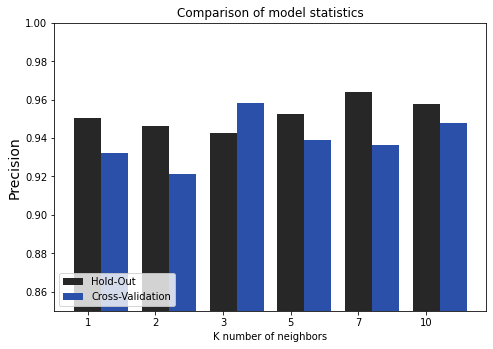

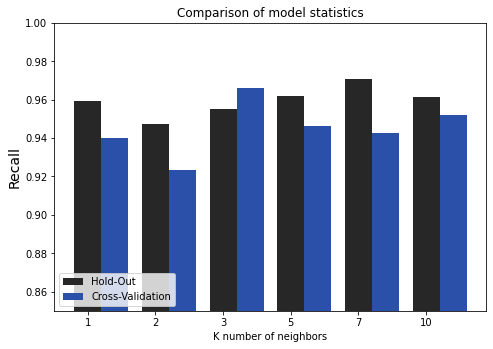

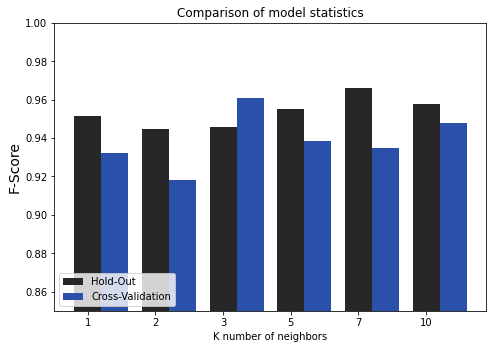

In [7]:
import random
from random import randrange
import time
random.seed(time.time())

# La plupart des fonctions ci-dessous sont des fonctions reprises des slides de cours

# Split a dataset into a train and test set
def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

#Split a dataset into n folds
def	cross_validation_split(dataset,	n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size =	int(len(dataset)/n_folds)
    for	_ in range(n_folds):
        fold = list()
        while len(fold)	< fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return	dataset_split

#calculate euclidian distance between two dataframe rows
def euclidianDistance(row1, row2):
    distance = 0
    for i in range(1, len(row1)):
        distance = distance + (row1[i] - row2[i])**2
    return distance**0.5   

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidianDistance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[0] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction


def confusionMatrixKNN(train,test,k):
    cm = np.zeros((3,3))
    for i in range(len(test)):
        pred = (int)(predict_classification(train,test[i],k) - 1)
        true = (int)(test[i][0] - 1)
        cm[pred][true] += 1
    return cm     

def StatisticsModelResultKNN(train,test,k):
    statistics = []
    accuracyAll = []
    precisionAll = []
    recallAll = []
    fscoreAll = []
    cm = confusionMatrixKNN(train,test,k)
    for j in range(3):
        j = j+1
        accuracyAll.append(accuracy(cm,j))
        precisionAll.append(precision(cm,j))
        recallAll.append(recall(cm,j))
        fscoreAll.append(fScore(cm,j))
    statistics.append(accuracyAll)
    statistics.append(precisionAll)
    statistics.append(recallAll)
    statistics.append(fscoreAll)

    return statistics

def Average(lst):
    return sum(lst) / len(lst)

def diagSim(m):
    for i in range(len(m)):
        m[i].reverse()
    return np.rot90(m)


tab_k = [1,2,3,5,7,10]
dfNormList = dfNorm.to_numpy().tolist()

def KNN_Hold_Out(dfNormList,splits):
    print("KNN using hold-out validation, ",splits,"splits")
    avgStat = []
    for k in tab_k:
        statistics = [[],[],[],[]]
        for _ in range(splits-1):
            train, ds_copy = train_test_split(dfNormList)
            tmp = (StatisticsModelResultKNN(train,ds_copy,k))
            for j in range(len(tmp)):
                for mesure in tmp[j]:
                    statistics[j].append(mesure)
        #accuracy, precision, recall, fscore
        avgStat.append([Average(statistics[0]), Average(statistics[1]), Average(statistics[2]), Average(statistics[3])]) 
        print("k = {:2d} | Accuracy : {:5f} | Precision : {:5f} | Recall : {:5f} | F-Score : {:5f}"
        .format(k, Average(statistics[0]), Average(statistics[1]), Average(statistics[2]), Average(statistics[3])))
    print("")
    return diagSim(avgStat)
    
def KNN_Cross_validation(dfNormList,n_fold):
    print("KNN using cross validation, ",n_fold,"folds")
    avgStat = []
    for k in tab_k:
        statistics = [[],[],[],[]]
        foldedData = cross_validation_split(dfNormList, n_fold)
        for i in range(len(foldedData)):
            train = foldedData[i] 
            test = []
            for j in range(len(foldedData)):
                if j != i:
                    test.extend(foldedData[j])
            tmp = (StatisticsModelResultKNN(train,test,k))
            for j in range(len(tmp)):
                for mesure in tmp[j]:
                    statistics[j].append(mesure)
        #accuracy, precision, recall, fscore
        avgStat.append([Average(statistics[0]), Average(statistics[1]), Average(statistics[2]), Average(statistics[3])])
        print("k = {:2d} | Accuracy : {:5f} | Precision : {:5f} | Recall : {:5f} | F-Score : {:5f}"
        .format(k, Average(statistics[0]), Average(statistics[1]), Average(statistics[2]), Average(statistics[3])))
    print("")
    return diagSim(avgStat)

avgStat_HoldOut = KNN_Hold_Out(dfNormList,10)
avgStat_CrossValidation = KNN_Cross_validation(dfNormList,5)
tab_columns = ['Accuracy','Precision','Recall','F-Score']

def BarPlot(avgStat1,avgStat2,tab_k,tab_columns):
    X = np.arange(len(tab_k))
    for i in range(len(avgStat1)):
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.set_ylim(0.85,1)
        ax.bar(X+0,avgStat1[i],width=0.4,color='#272727', label='Hold-Out')
        ax.bar(X+0.4,avgStat2[i],width=0.4,color='#2B50AA', label='Cross-Validation')
        plt.legend(['Hold-Out','Cross-Validation'],loc='lower left')
        ax.set_xticks(X, labels=tab_k)
        ax.set_title("Comparison of model statistics")
        ax.set_ylabel(tab_columns[i],fontsize=14)
        ax.set_xlabel("K number of neighbors")
        plt.show


BarPlot(avgStat_HoldOut,avgStat_CrossValidation,tab_k,tab_columns)


On peut constater que pour le hold-out est generalement mieux pour tout les types de metriques. 
On peut constater également que le modele a les meilleurs performances lors que k = 10

Pour ce cas précis, on va utiliser le l'algorithme des k plus proches voisins (k-NN) avec k = 10 et la validation hold-out

Il faut également constater que les resultats font une chute lors de la cross-validation avec k = 10

# POUR FAROUK ! SUPPRIMER CE BLOCK POUR RENDU

avrStat_HoldOut         = KNN_Hold_Out(dfNormList,10)  
avrStat_CrossValidation = KNN_Cross_validation(dfNormList,5)  

Les vars livrée ci-dessus sont des matrices comme suit:  

accuracyK1,  accuracyK2, accuracyK3, accuracyK5, accuracyK7, accuracyK10  
precisionK1, precisionK2, precisionK3, precisionK5, precisionK7, precisionK10  
recallK1,    recallK2, recallK3, recallK5, recallK7, recallK10  
fscoreK1, fscoreK2, fscoreK3, fscoreK5, fscoreK7, fscoreK10  

couleurs des graphes : '#272727' et '#2B50AA'  

dfNormList : les données normalisées du df de base dans une structure liste

Dans le bloc de code en dessous de 2) a-b), il y a plusieurs fonctions qui pourrait t'etre utile comme accuracy(cm,c) qui calcule l'accuracy a partir d'une matrice de confusion (cm) et c qui est la classe consernée

J'ai essayé de beaucoup utiliser les matrices de confusion pour stocker l'information car on peut en deriver toutes les stats interessantes.

Si tu as des questions sur comment quelque chose fonctionne fait moi un message !

## 4)